# **ME C231A, EE C220B, Experiential Advanced Control I** 
# **Midterm Fall 2020**
# University of California Berkeley

***

Remember
1. The submission will be EXACTLY the same as your homework. Download the midterm from bCourses and upload with Gradescope.
2. Submit your file BEFORE 12.30PM. The online submission will close at 12.30PM and NO LATE submission will be accepted.
3. Multiple submissions (before 12.30) will be allowed.
4. **Your  submission of your solutions will act as a confirmation that you have not discussed this exam with anyone during the exam period. We have different tools to identify cheating, and we will not tolerate any exception.**


A quick summary of the questions. "Minimal coding"  means 1 or 2 lines of code.

*  The questions are in blue, do not modify the cells containing the questions
*   A1. No coding. Estimated time 2min
*   A2 part  1 and 2. No coding, little pencil/paper work. Estimated time 4min
*   A3. Minimal coding. Estimated time 1min
*   A4 part  1 and 2. Minimal coding. Estimated time 2min
*   B1. No coding. Estimated time 2min
*   B2. Some coding (start from software in lab/homework and work will be minimal). Estimated time 4min
*   B3. No coding. Estimated time 2min
*   C1. Some coding (start from software in lab/homework and work will be minimal). Estimated time 10min
*   C2. Minimal coding once C1 is available. Estimated time 4min
*   C3. No coding. Estimated time 2min
*   D1. No coding, some pencil/paper work. Estimated time 10min
*   D2. No coding. Estimated time 3min

Total: expected 60 minutes (points assignment for each question approximately: 1point=1 expected minute)

In [1]:
# # Run this cell only if you are using Colab
# # install required dependencies
# import sys
# IN_COLAB = 'google.colab' in sys.modules
# if IN_COLAB:
#   !pip install -q pyomo
#   !apt-get install -y -qq glpk-utils
#   !apt-get install -y -qq coinor-cbc
#   !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
#   !unzip -o -q ipopt-linux64



---


## <font color=blue> **Part A: Modeling** </font>




***

### <font color=blue> Question A1. System properties </font>
<font color=blue> Consider the system
\begin{align}
x(t+1)=sin(t)x(t)+cos(t)u(t)~\\
\end{align}
Answer the following questions in the Text Cell below with True or False</font>

<font color=blue>
    
1.  The system is linear
2.  The system is time-invariant
3.  The pair (0,0) is an equilibrium point of the system 
    
</font>

---








ANSWER A1:
1.   True   
2.   False   
3.   True   


***

### <font color=blue> Question A2.  Equilibrium Point and Linearization </font>
<font color=blue>Consider the discrete time nonlinear system 
\begin{align}
(A2)~~~~~~x(t+1)=x^2(t)+u_1(t)u_2(t)~\\
\end{align}
Find an equilibrim point with $x_{eq}=2$ and report the corresponding for $u_{1,eq}$ and $u_{2,eq}$ below </font>


---




ANSWER A2 part 1:

An equilibrium point is:
* $x_{eq}=2$
* $u_{1,eq}=-1$    
* $u_{2,eq}= 2$     



---
<font color=blue> Report the A and B matrices of the linear system obtained by 
linearizing the system (A2) around the previous equilibrium point. You can use the notation [[1,1,3],[1,2,1]] to denote a matrix 2x3 with first row [1,1,3] </font>

---

ANSWER A2 part 2: 


1.   A= [4]    
2.   B= [-2,1]   





---


###  <font color=blue> Question A3. Euler Discretization of an ODE Model</font> 
<font color=blue>Consider the ODE
\begin{align}
\dot{T} = T(t)u(t) 
\end{align}</font>
    
<font color=blue>Use the Euler discretization approximation to derive the equivalent discrete time model with sampling time $T_s=0.1s$:</font>
    
<font color=blue>\begin{align}
T_{k+1}=f(T_k,u_k)
\end{align}
Fill in the line 3 of the following code cell and run the cell to print the output
</font>


---





In [2]:
# ANSWER A3
def f(Tk,uk):
    Ts = 0.1
    T_KplusOne = Tk + Ts* (Tk * uk) 
    return T_KplusOne

T_KplusOne = f(Tk=60,uk=1)
print(T_KplusOne)

66.0


***

### <font color=blue> Problem A4. Simulation of a Nonlinear Model </font>
<font color=blue>The following code is a simulator for the system
\begin{align}
x_{k+1}= sin(x_k) + u_k
\end{align}
starting from initial condition $x0 = 0$ and applying no input. Look at the code, run it and go to the next Text cells which contain the questions.
<font color=blue>
</font>

--



In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, tan, arcsin, exp,pi
def f(xk, uk, k): 
    xkplusone= sin(xk) +uk
    return xkplusone

def sim(numSteps, x0): 
    
    # Initialize trends
    xtrend = []
    utrend = []
    xtrend.append(x0)
    #set initail state
    xk = x0

    for k in range(0, numSteps-1):
        uk=0        
        xkplusone = f(xk, uk,k)
        xtrend.append(xkplusone)
        utrend.append(uk)
        xk=xkplusone
        
    return np.asarray(xtrend, dtype=object), np.asarray(utrend, dtype=object)
    
# starting the simualtion
x0 = 0.0
numSteps = 50
xtrend, utrend = sim(numSteps, x0)


# plotting the results
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(xtrend)
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(utrend)
plt.ylabel('u')
plt.show()




<Figure size 1200x800 with 2 Axes>

</font>



---


### <font color=blue> Question A4 Part 1. 

<font color=blue> We copied  the code provided above in the following cell. 
Design and tune a simple Proportional controller to bring the system state $x_k$ as close as possible to $x_{ref}=1$ without too many oscillations. (a rough tuning is ok... start from a controller gain of k=-0.5). 
Modify the code in the next cell to plot the simulations of the closed-loop system.</font>


---



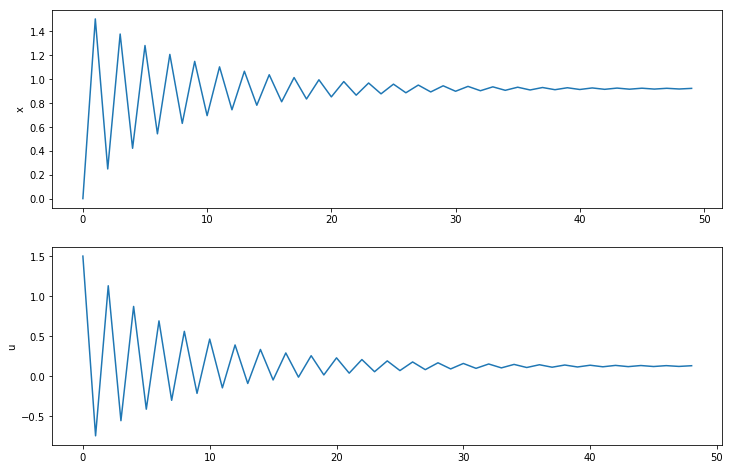

In [4]:
# ANSWER A4.1 (Please modify this code to answer Question A4 part 1)
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, tan, arcsin, exp,pi
def f(xk, uk, k): 
    xkplusone= sin(xk) +uk
    return xkplusone

def sim(numSteps, x0): 
    
    # Initialize trends
    xtrend = []
    utrend = []
    xtrend.append(x0)
    #set initail state
    xk = x0

    for k in range(0, numSteps-1):
        uk= -1.5*(xk -1)        
        xkplusone = f(xk, uk,k)
        xtrend.append(xkplusone)
        utrend.append(uk)
        xk=xkplusone
        
    return np.asarray(xtrend, dtype=object), np.asarray(utrend, dtype=object)
    
# starting the simualtion
x0 = 0.0
numSteps = 50
xtrend, utrend = sim(numSteps, x0)


# plotting the results
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(xtrend)
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(utrend)
plt.ylabel('u')
plt.show()


---


### <font color=blue> Question A4 Part2. 
 <font color=blue> Use the same controller and tuning as before and assume that the system is subject to an additive step disturbance. 
\begin{align}
x_{k+1}= sin(x_k) + u_k+ d_k
\end{align}
where 
\begin{align}
d_k= 0~\textrm{if}~k<20~~~\textrm{and}~~~d_k=1~\textrm{if}~k>=20
\end{align}
Copy the code of question A4 part 1 in the cell below and modify it to simulate the step disturbance effect. Report the plots of the closed-loop simulations.
</font>

---



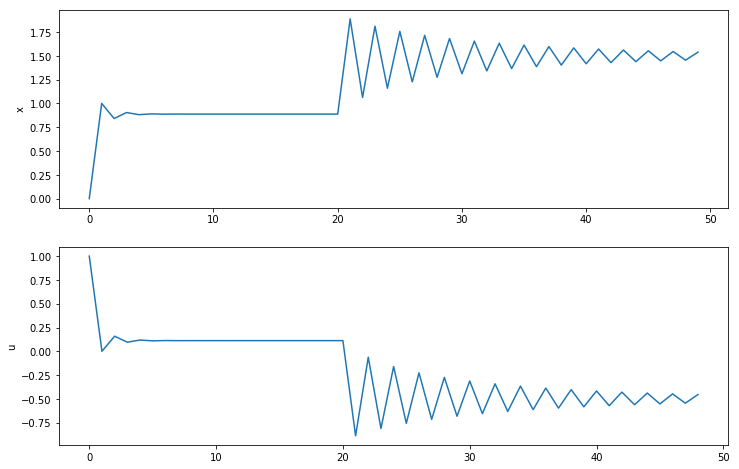

In [5]:
# ANSWER A4.2 Part 2 

def f(xk, uk, k): 
    d = 0 if k < 20 else 1
    xkplusone= sin(xk) +uk + d
    return xkplusone

def sim(numSteps, x0): 
    
    # Initialize trends
    xtrend = []
    utrend = []
    xtrend.append(x0)
    #set initail state
    xk = x0

    for k in range(0, numSteps-1):
        uk= -1 *(xk -1)        
        xkplusone = f(xk, uk,k)
        xtrend.append(xkplusone)
        utrend.append(uk)
        xk=xkplusone
        
    return np.asarray(xtrend, dtype=object), np.asarray(utrend, dtype=object)
    
# starting the simualtion
x0 = 0.0
numSteps = 50
xtrend, utrend = sim(numSteps, x0)


# plotting the results
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(xtrend)
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(utrend)
plt.ylabel('u')
plt.show()




---


## **<font color=blue> Part B- Optimization </font>**



***

### <font color=blue> Question B1. Consider the following optimization problem:
\begin{align}
\begin{array}{ll} \underset{x \in \mathbb{R}^n,\epsilon\in \mathbb{R}}{\min{}} & x^THx + f^Tx+g \\
\textrm{s.t.} & A x \le b - \epsilon^2 \mathbb{1}_m \\
\end{array}~\\~\\
\end{align}
where $H \in \mathbb{R}^{n \times n}$, $f \in \mathbb{R}^{n}$, $g \in \mathbb{R}$, $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^{m}$, $\epsilon \in \mathbb{R}$, and $\mathbb{1}_m$ is a column vector of length $m$ containing ones.
1. Its convexity depends only on $H$
2.  The problem is convex for $H>0$, $f=\textrm{rows of zeros}$, $g=0$.
3.  Its convexity depends on $A$ and $b$
4. Its feasibility depends on $H$ and $f$
5. Its feasibility depends on $A$ and $b$
6. It is a quadratic program

</font>


---




ANSWER B1:

1. True  
2. True   
3. False     
4. False     
5. True     
6. True     




---


### <font color=blue> Question B2. Consider the following Linear Program: </font>
<font color=blue> 
\begin{aligned}
p^* = \ \ 
& \underset{x \in \mathbb{R}^3}{\text{minimize}} 
& & \lVert Ax-b \rVert_{\infty} \\
& \text{subject to}
& & \ Cx \leq d~\\
\end{aligned}
where 
$A=\begin{bmatrix}\phantom{\text{-}}2&\phantom{\text{-}}0&\text{-}1\\\phantom{\text{-}}1&\text{-}1&\phantom{\text{-}}0\end{bmatrix}$ , $ b = \begin{bmatrix}\phantom{\text{-}}1\\\phantom{\text{-}}2\end{bmatrix}$, 
$C = \begin{bmatrix}\phantom{\text{-}}1&\text{-}1&\phantom{\text{-}}1\\\text{-}1&\text{-}1&\phantom{\text{-}}0 \end{bmatrix}$, $d = \begin{bmatrix}\text{-}1\\\text{-}1\end{bmatrix}$.
    
1. Transform it into a standard linear program (you can do this on a piece of paper, nothing to submit)
2. Solve the LP in the Code Cell below and print the optimal cost $p^*$, the optimizer $x^*$
</font>


---



In [6]:
#ANSWER B2

from pyomo.opt import SolverStatus, TerminationCondition
import numpy as np
import pyomo.environ as pyo
import numpy as np 
import cvxopt


def reg1Inf(A_in,b_in,c_in,d_in):
    # the question transformed to:
    # min(x1,x2,x3,t){t}
    # t = max(|A_in *x - b_in|)

    n_1, nx = np.shape(A_in)

    c = np.array([0]*nx + [1])
    A = np.concatenate(
        [
            np.concatenate([A_in,-np.ones((2,1))],axis=1),
            np.concatenate([-A_in,-np.ones((2,1))],axis=1),
            np.concatenate([c_in,np.zeros((2,1))],axis= 1)
        ],axis = 0
    )

    b = np.concatenate([b_in,-b_in,d_in],axis=0)

    c = cvxopt.matrix(c,tc='d')
    A = cvxopt.matrix(A,tc='d')
    b = cvxopt.matrix(b,tc='d')


    sol = cvxopt.solvers.lp(c,A,b)
    xOpt = sol['x']
    J = sol['primal objective']
    return xOpt[:nx],J 


a = np.array([[2,0,-1],[1,-1,0]])
b = np.array([1,2]).reshape((2,1))
c = np.array([[1,-1,1],[-1,-1,0]])
d = np.array([-1,-1]).reshape((2,1))
xOpt, J = reg1Inf(a,b,c,d)
print('xOpt: ',xOpt)
print('J* = ',J)


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  2.0000e+00  1e+01  1e+00  5e+00  1e+00
 1:  2.1292e+00  2.2522e+00  2e+00  2e-01  5e-01  1e-02
 2:  1.6741e+00  1.6815e+00  4e-02  5e-03  2e-02  4e-03
 3:  1.6667e+00  1.6668e+00  4e-04  5e-05  2e-04  4e-05
 4:  1.6667e+00  1.6667e+00  4e-06  5e-07  2e-06  4e-07
 5:  1.6667e+00  1.6667e+00  4e-08  5e-09  2e-08  4e-09
Optimal solution found.
xOpt:  [ 6.67e-01]
[ 3.33e-01]
[-1.33e+00]

J* =  1.66666667407432




---


### <font color=blue> Question B3
<font color=blue>
You have 5 solvers which you use to solve the following problem:
\begin{align}
\min_{z_1,z_2}~ &  -z_1-2z_2  \nonumber\\
\text{s.t. } & z_1 +z_2 \leq 10  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber~\\
\end{align}
Their respective primal/dual optimal solutions are 

* 
<font color=blue> Solver A: $z_1^*=-10,~z_2^*=10$, and $u_1^*=1,~u_2^*=1,u_3^*=1,$
* Solver B: $z_1^*=0,~z_2^*=10$, and $u_1^*=2,~u_2^*=1,u_3^*=1,$
* Solver C: $z_1^*=0,~z_2^*=10$, and $u_1^*=2,~u_2^*=1,u_3^*=0,$
* Solver D: $z_1^*=1,~z_2^*=10$, and $u_1^*=-2,~u_2^*=1,u_3^*=1,$
* Solver E: $z_1^*=0.5,~z_2^*=0.5$, and $u_1^*=2,~u_2^*=1,u_3^*=0,$


<font color=blue> (where $u_1^*$, $u_2^*$ and $u_3^*$ are the Lagrange multipliers associated to the three inequality constraints in the order written above.)

<font color=blue>
Only one solver is correct. The others have some bugs. Without using any coding and simply thinking of KKT conditions and LP properties can you quickly identify which solver is the correct one?
</font>


---




ANSWER B3:

Complete the dots "..." for each solver

* The correct sover is C             
* Solver D is wrong because u1* < 0         
* Solver A is wrong because Z1* <0                                                
* Solver E is wrong because  u1* * g(z1*,z2*) is not 0              
* Solver B is wrong because  u3* * g(z1*,z2*)  is not 0                                             
---







## **<font color=blue> Part C- Optimal Control - Batch Approach </font>**


---



### <font color=blue>Question C.1 Consider the following finite-time optimal control problem
\begin{align}
	\min_{x_0,\ldots,x_N,u_0,\ldots,u_{N-1}} &\sum_{k=0}^{k=N}  \|x_k  - \bar{x}_N \|_2^2\nonumber\\
	& x_{k+1}=\sin(x_k)+u_k &&~\forall k = \left\{0,\ldots,N-1 \right\} \nonumber\\
	& \text{-}0.2 \leq u_k \leq 0.2 &&~\forall k = \left\{0,\ldots,N-1 \right\} \nonumber\\
	%& |a(k+1) - a(k)| \leq a_d &&~\forall k = \left\{0,\ldots,H_p-1 \right\} \nonumber\\
	& \lvert x_N -\bar{x}_N \rvert \leq 0.1 \nonumber\\
	& x_0 = x(0) \nonumber\\~\\
\end{align}
<font color=blue> where $N=50$ and $\bar{x}_N = 1$.
Use the Batch approach to compute the $\textit{open-loop optimal}$ solution $U^*_0(x(0))$ where $U^*_0=[u_0^*,\ldots,u_{49}^*]$ for the initial conditions $x(0)=0.0$.</font>
    
<font color=blue> 
    
1. Type your code in the next Cell.
2. Print $u_0^*$,  $u_{18}^*$,  $u_{49}^*$,  $x_{19}^*$,  $x_{49}^*$
3. Plot the $\textit{optimal}$ state and input trajectory as a function of time
</font>


---



0.20000000977468013 0.1585290131438107 0.15852901314382012 0.9999999955442613 0.9999999955442604


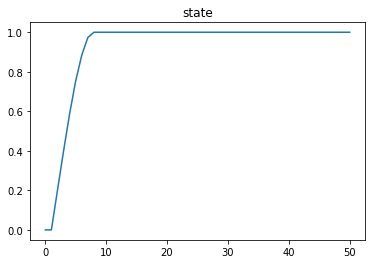

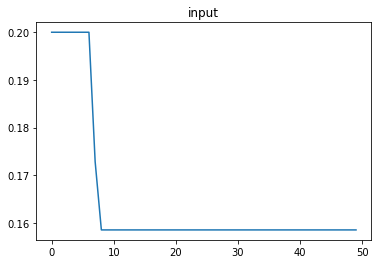

In [7]:
# ANSWER C.1

import matplotlib.pyplot as plt
import numpy as np 
import pyomo.environ as pyo

N = 50
xNbar = 1
x0 =0 
m = pyo.ConcreteModel()
m.tidx = pyo.Set(initialize = range(N+1))
m.u = pyo.Var(m.tidx)
m.x = pyo.Var(m.tidx)

m.cost = pyo.Objective(
    expr = sum((m.x[t]-xNbar) **2 for t in m.tidx),
    sense= pyo.minimize 
    
)

m.c1 = pyo.Constraint(
    m.tidx, rule = lambda m,t:
    m.x[t+1] == pyo.sin(m.x[t]) + m.u[t]
    if t < N else pyo.Constraint.Skip
)
m.c21 = pyo.Constraint(
    m.tidx, rule = lambda m,t:
    m.u[t] <= 0.2
    if t<N else pyo.Constraint.Skip
)
m.c22 = pyo.Constraint(
    m.tidx, rule = lambda m,t:
    m.u[t] >= -0.2
    if t<N else pyo.Constraint.Skip
)
m.c31 = pyo.Constraint(
    expr = m.x[N] -xNbar >= -0.1
)
m.c32 = pyo.Constraint(
    expr = m.x[N] -xNbar <= 0.1
)
m.c4 = pyo.Constraint(expr = m.x[0] == x0)

results = pyo.SolverFactory('ipopt').solve(m)

x= [m.x[0]()]
u= [m.u[0]()]
for t in m.tidx:
    if t< N: 
        x.append(m.x[t]())
        
    if t< N-1:
        u.append(m.u[t]())

print(u[0],u[18],u[49],x[19],x[49])
plt.plot(x)
plt.title('state')
plt.show()
plt.plot(u)
plt.title('input')
plt.show()




---
### <font color=blue> Question C.2. Solve the same problem of Question C.1 with just one change. </font>
<font color=blue>

Assume that the system is subject to an additive disturbance which is completely known during the control design:
\begin{align}
x_{k+1}= sin(x_k) + u_k+ d_k
\end{align}
where 
\begin{align}
d_k= 0~\textrm{if}~k<20~~~\textrm{and}~~~d_k=0.3~\textrm{if}~k>=20
\end{align}
</font>
    
<font color=blue> Here "the disturbance is completely known during the control design" means: add it in your model of the optimization problem when you are building the Pyomo model. Use the Batch approach to compute the optimal solution $U^*_0(x(0))$ where $U^*_0=[u_0^*,\ldots,u_{49}^*]$ for the initial conditions $x(0)=0.0$ </font>
 
<font color=blue>
    
1. Type your code in the next Cell.
2. Print $u_0^*$,  $u_{18}^*$,  $u_{49}^*$,  $x_{19}^*$,  $x_{49}^*$
3. Plot the optimal state and input trajectory as a function of time
</font>
---


0.2000000093789072 0.15852900954599444 -0.14147098105945097 0.9999999877177835 1.0000000081541545


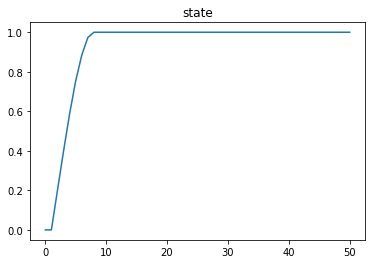

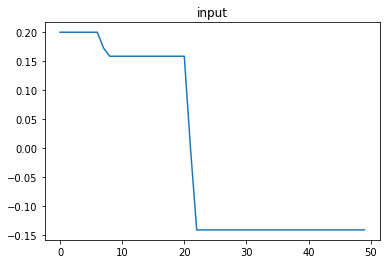

In [8]:
#  ANSWER C.2

import matplotlib.pyplot as plt
import numpy as np 
import pyomo.environ as pyo

N = 50
xNbar = 1
x0 =0 
m = pyo.ConcreteModel()
m.tidx = pyo.Set(initialize = range(N+1))
m.u = pyo.Var(m.tidx)
m.x = pyo.Var(m.tidx)
m.d = pyo.Var(m.tidx)

m.cost = pyo.Objective(
    expr = sum((m.x[t]-xNbar) **2 for t in m.tidx),
    sense= pyo.minimize 
    
)

m.c1 = pyo.Constraint(
    m.tidx, rule = lambda m,t:
    m.x[t+1] == pyo.sin(m.x[t]) + m.u[t] + m.d[t]
    if t < N else pyo.Constraint.Skip
)
m.c21 = pyo.Constraint(
    m.tidx, rule = lambda m,t:
    m.u[t] <= 0.2
    if t<N else pyo.Constraint.Skip
)
m.c22 = pyo.Constraint(
    m.tidx, rule = lambda m,t:
    m.u[t] >= -0.2
    if t<N else pyo.Constraint.Skip
)
m.c31 = pyo.Constraint(
    expr = m.x[N] -xNbar >= -0.1
)
m.c32 = pyo.Constraint(
    expr = m.x[N] -xNbar <= 0.1
)
m.c4 = pyo.Constraint(expr = m.x[0] == x0)
m.c5 = pyo.Constraint(m.tidx, rule = lambda m,t: m.d[t] ==0 if t < 20 else pyo.Constraint.Skip)
m.c6 = pyo.Constraint(m.tidx, rule = lambda m,t: m.d[t] ==0.3 if t > 20 else pyo.Constraint.Skip)

results = pyo.SolverFactory('ipopt').solve(m)

x= [m.x[0]()]
u= [m.u[0]()]
for t in m.tidx:
    if t< N: 
        x.append(m.x[t]())
        
    if t< N-1:
        u.append(m.u[t]())

print(u[0],u[18],u[49],x[19],x[49])
plt.plot(x)
plt.title('state')
plt.show()
plt.plot(u)
plt.title('input')
plt.show()



---


### <font color=blue> Question C.3 Compare the results of Question C1 and C2 and answer the following questions (just text , no Code).




<font color=blue> 1. Why the two $u^*_{19}$ are different, even if the disturbance happens at step k=20?

<font color=blue> 2. If you increase the disturbance  amplitude $d_k$ from 0.3 to 1 the problem becomes infeasible.What is the reason of this infeasibility? 

---




ANSWER C.3

1. The optimization will take future influence into account, so if the constraint is for k = 20, decision for k = 19 will be influenced.
2. if xk+1 varies too much, constraint 2 will not be satisfied because the uk will not be big enough to adjust xk+1.



---


## **<font color=blue> Part D- Optimal Control - DP Approach </font>**


---



### <font color=blue>Question D.1 Consider the following finite-time optimal control problem
\begin{align}
	\min_{x_0,\ldots,x_N,u_0,\ldots,u_{N-1}} &\sum_{k=0}^{k=N}  \|x_k  - \bar{x}_N \|_2^2\nonumber\\
	& x_{k+1}=\sin(x_k)+u_k &&~\forall k = \left\{0,\ldots,N-1 \right\} \nonumber\\
	& \text{-}0.2 \leq u_k \leq 0.2 &&~\forall k = \left\{0,\ldots,N-1 \right\} \nonumber\\
	%& |a(k+1) - a(k)| \leq a_d &&~\forall k = \left\{0,\ldots,H_p-1 \right\} \nonumber\\
	& \lvert x_N \rvert \leq 0.1 \nonumber\\
	& \bar{x}_N = 1\nonumber\\
	& x_0 = 0 \nonumber\\~\\
\end{align}
<font color=blue> where $N=2$.
Use the Dynamic Programming approach to compute the closed-loop optimal solution of the problem only for the gridded states and gridded inputs shown in the next figure
</font>

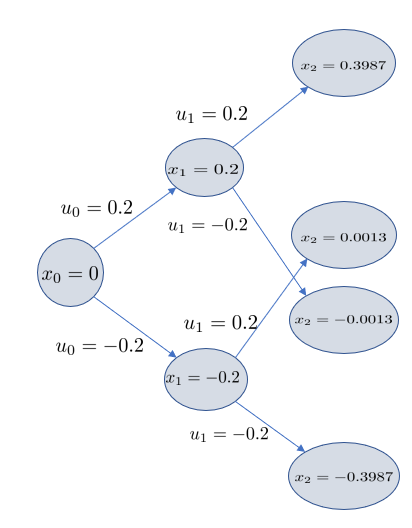

ANSWER D.1:

Use a Dynamic programming approach (you do not really need any software, paper and pencil is very fast) and
1. Replace in the formulas  .... with the right number or NaN for input and
2. Replace in the formulas  .... with the right number or infinity for cost

(double click in this cell and write your answer in the '....')



\begin{equation}
\begin{array}{lcl}
u^*_0(x_0) &=& \left\{ \begin{array}{lll} \textrm{0.2} & \textrm{if} & x_0=0.0 \end{array} \right.
\end{array}
\end{equation}

\begin{equation}
\begin{array}{lcl}
J^*_{0\rightarrow 2}(x_0) &=& \left\{ \begin{array}{lll}\textrm{2.64} & \textrm{if} & x_0=0.0 
\end{array} \right.~\\~\\
\end{array}
\end{equation}

\begin{equation}
\begin{array}{lcl}
u^*_1(x_1) &=& \left\{ \begin{array}{lll} \textrm{-0.2} & \textrm{if} & x_1=0.2 \\\textrm{0.2} & \textrm{if} & x_1=-0.2 
\end{array} \right.
\end{array}
\end{equation}

\begin{equation}
\begin{array}{lcl}
J^*_{1\rightarrow 2}(x_1) &=& \left\{ \begin{array}{lll}\textrm{1.64} & \textrm{if} & x_1=0.2 \\\textrm{2.4374}  & \textrm{if} & x_1=-0.2 \end{array} \right.~\\~\\
\end{array}
\end{equation}

\begin{equation}
\begin{array}{lcl}
J^*_{2\rightarrow 2}(x_2) &=& \left\{ \begin{array}{lll}\textrm{infinity} & \textrm{if} & x_2=0.3987 \\\textrm{0.9974}  & \textrm{if} & x_2=0.0013 
\\\textrm{1.0026}  & \textrm{if} & x_2=-0.0013 
\\\textrm{infinity}  & \textrm{if} & x_2=-0.3987 
\end{array} \right.~\\~\\
\end{array}
\end{equation}

---





---
### <font color=blue> Question D.2 The approach to solve the CFTOC problem in question D1 relies on state and input discretization. Assume you solved the same problem in question D1 with a batch approach. If you compared the cost $J^*_{0\rightarrow 2}(x_0)$ of the Batch solution  with the same cost of the DP solution you would obtain

1. The Batch Approach cost is lower since the DP approach uses discretization. 
2. The DP Approach cost might be still the same, since we were lucky and discretized along the optimal state and input trajectory.
3. You  cannot make any statements since the Batch solver (IPOPT) might get stuck in a local optima and the DP approach uses a discretization and thus is suboptimal. Anything can happen: $J^*_{0\rightarrow 2}(x_0)$ Batch <= $J^*_{0\rightarrow 2}(x_0)$ DP or $J^*_{0\rightarrow 2}(x_0)$ Batch > $J^*_{0\rightarrow 2}(x_0)$ DP.





Only one is True, which one?

ANSWER D2: 1,2, or 3?

3



In [9]:
# pdf conversion steps: 

# If you are using docker, to make a pdf from your .ipynb file follow these steps:

# Inside your docker container open a New Launcher by tapping + icon at the top left and then a Terminal.
# cd to the directory that your Midterm_2020.ipynb file is located.
# Run jupyter nbconvert --to html Midterm_2020.ipynb to make html version. (converting directly to pdf may cause some error, so we convert to html first and then pdf file.)
# Navigate to your mounted folder on your local machine and open the html file (If you open html file inside the container you cannot see the equations that are written in Latex. So you just need to open it on your host browser.)
# Now you can print (Ctrl+p) and save it as a pdf file.

# If you are using Colab, you just need to print and save as a pdf file.